In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import seaborn as sns 
df = pd.read_excel(open('/Users/ymzhang/Desktop/data.xlsx','rb'), sheetname='Sheet0')

In [2]:
df.ix[(df.youzhi_rate<0.7) & (df.push>40),].shape

(10, 21)

In [3]:
df.isnull().describe()

,order_date,restaurant_id,retailer_id,push,yichang,min60,judan,chaping,customer_tousu,shoppers_tousu,...,liezhi,deliver_time,yichang_rate,min60_rate,judan_rate,chaping_rate,tousu_rate,liezhi_rate,youzhi_rate,push_num_bad_rate
count,24712,24712,24712,24712,24712,24712,24712,24712,24712,24712,...,24712,24712,24712,24712,24712,24712,24712,24712,24712,24712
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,24712,24712,24712,24712,24712,24712,24712,24712,24712,24712,...,24712,24712,24712,24712,24712,24712,24712,24712,24712,24712


没有发现空值

#### 运单量的分布图

/Users/ymzhang/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


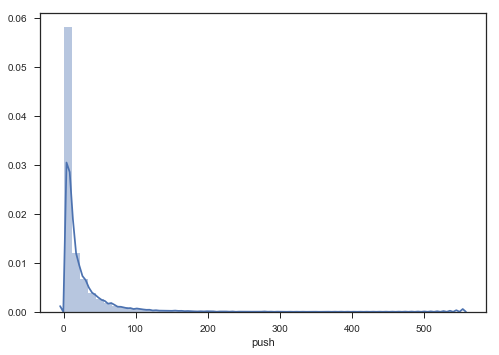

In [4]:
sns.set_style("ticks")
sns.distplot(df["push"]) 

#### 优质单率的分布


/Users/ymzhang/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


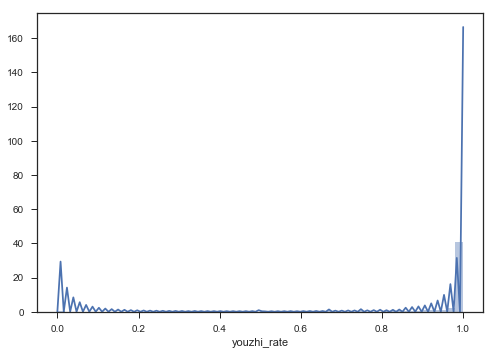

In [5]:
sns.set_style("ticks")
sns.distplot(df["youzhi_rate"]) 

#### 优质单率的直方图

(array([  4.42000000e+02,   5.00000000e+00,   1.70000000e+01,
          5.30000000e+01,   2.80000000e+01,   3.30000000e+02,
          2.53000000e+02,   3.53000000e+02,   1.10100000e+03,
          2.39370000e+04]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

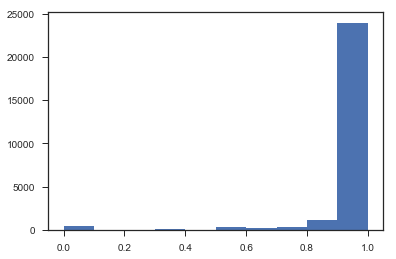

In [47]:
plt.hist(df["youzhi_rate"])

#### 推单数的直方图

(array([    0.,  4108.,  2973.,  2090.,  1519.,  1329.,  1068.,   938.,
          822.,   668.,   597.,   556.,   495.,   451.,   419.,   368.,
          346.,   338.,   281.,   282.,   233.,   234.,   267.,   229.,
          240.,   193.,   216.,   180.,   177.,   134.,   160.,   147.,
          154.,   139.,   116.,   113.,   103.,   113.,   111.,   112.,
          107.,   114.,    86.,    95.,    92.,    74.,    73.,    73.,
           87.,    84.,    72.,    66.,    72.,    72.,    62.,    62.,
           72.,    65.,    66.,    44.,    52.,    47.,    42.,    47.,
           46.,    42.,    45.,    44.,    48.,    30.,    43.,    27.,
           28.,    31.,    34.,    37.,    34.,    33.,    33.,    28.,
           35.,    21.,    26.,    18.,    21.,    19.,    20.,    18.,
           14.,    27.,    21.,    24.,    18.,    13.,    25.,    15.,
           23.,    14.,    43.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21

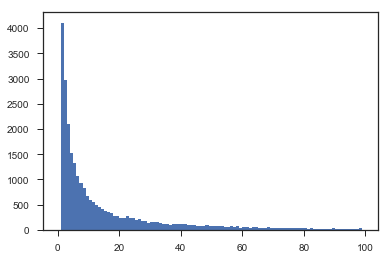

In [48]:
plt.hist(df["push"],bins=np.arange(100))

#### 配送时长的直方图

(array([  7.10000000e+02,   8.73100000e+03,   1.50850000e+04,
          1.82100000e+03,   1.50000000e+02,   1.90000000e+01,
          2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([   0.   ,   13.305,   26.61 ,   39.915,   53.22 ,   66.525,
          79.83 ,   93.135,  106.44 ,  119.745,  133.05 ]),
 <a list of 10 Patch objects>)

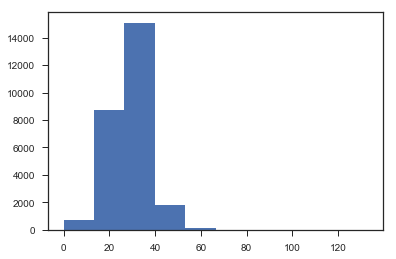

In [49]:
plt.hist(df["deliver_time"])

In [50]:
df.columns

Index(['order_date', 'restaurant_id', 'retailer_id', 'push', 'yichang',
       'min60', 'judan', 'chaping', 'customer_tousu', 'shoppers_tousu',
       'tousu', 'liezhi', 'deliver_time', 'yichang_rate', 'min60_rate',
       'judan_rate', 'chaping_rate', 'tousu_rate', 'liezhi_rate',
       'youzhi_rate', 'push_num_bad_rate'],
      dtype='object')

In [5]:
name=['restaurant_id','retailer_id','push','youzhi_rate','deliver_time']
names=(['push','youzhi_rate','deliver_time'])

#### 对数据做标准化变换

In [6]:
df1=df[names]
scaler=StandardScaler()
df1_scaled=scaler.fit_transform(df1)

#### 用Isolation Forest 来检测异常值

In [7]:
rng = np.random.RandomState(42)
clf=IsolationForest(max_samples=500,random_state=rng)

In [8]:
clf.fit(df1_scaled)
df1_pred=clf.predict(df1_scaled)

In [9]:
df1_pred

array([-1, -1,  1, ...,  1,  1,  1])

In [10]:
df['cluster']=df1_pred

In [17]:
import pandas as pd
pred=pd.Series(df1_pred)

#### 异常组和正常组统计描述对比
* -1:异常组 

* 1:正常组 

In [19]:
df[['push','yichang_rate','min60_rate','judan_rate','chaping_rate','tousu_rate','deliver_time','youzhi_rate','cluster']].groupby('cluster').describe()


chaping_rate  deliver_time    judan_rate    min60_rate  \
cluster                                                                 
-1      count   2472.000000   2472.000000   2472.000000   2472.000000   
        mean       0.008555     29.320380      0.082686      0.057923   
        std        0.070976     16.911884      0.208933      0.145500   
        min        0.000000      0.000000      0.000000      0.000000   
        25%        0.000000     22.255473      0.000000      0.000000   
        50%        0.000000     31.512913      0.000000      0.000000   
        75%        0.000000     39.964596      0.000000      0.043478   
        max        1.000000    134.316667      1.000000      1.000000   
 1      count  22240.000000  22240.000000  22240.000000  22240.000000   
        mean       0.000807     27.746394      0.002627      0.002841   
        std        0.008278      6.087109      0.018222      0.015303   
        min        0.000000      9.333333      0.000000      0.000000   
        25%        0.000000     23.683831      0.000000      0.000000   
        50%        0.000000     27.589444      0.000000      0.000000   
        75%        0.000000     31.566667      0.000000      0.000000   
        max        0.250000     48.416667      0.250000      0.250000   

                       push    tousu_rate  yichang_rate   youzhi_rate  
cluster                                                                
-1      count   2472.000000   2472.000000   2472.000000   2472.000000  
        mean      54.408981      0.001516      0.135027      0.717955  
        std       72.523200      0.019496      0.285577      0.328431  
        min        1.000000      0.000000      0.000000      0.000000  
        25%        2.000000      0.000000      0.000000      0.571429  
        50%        8.000000      0.000000      0.000000      0.846688  
        75%      105.000000      0.000000      0.052632      0.984283  
        max      552.000000      0.500000      1.000000      1.000000  
 1      count  22240.000000  22240.000000  22240.000000  22240.000000  
        mean      14.529631      0.000132      0.004193      0.989509  
        std       18.446540      0.003214      0.021133      0.032976  
        min        1.000000      0.000000      0.000000      0.750000  
        25%        2.000000      0.000000      0.000000      1.000000  
        50%        7.000000      0.000000      0.000000      1.000000  
        75%       19.000000      0.000000      0.000000      1.000000  
        max      117.000000      0.166667      0.250000      1.000000

In [20]:
center=df[['push','yichang_rate','min60_rate','judan_rate','chaping_rate','tousu_rate','deliver_time','youzhi_rate','cluster']].groupby('cluster').mean()

#### 展示异常组和正常组的差别
* X轴：推单量 
* Y轴：优质完成率 
* '+' 号标记这组均质

* 紫色：异常值
* 绿色：正常值

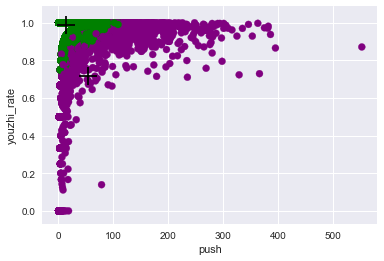

In [21]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
# create a "colors" array for plotting
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow','purple'])
# scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(df.push, df.youzhi_rate, c=colors[df.cluster])

# cluster centers, marked by "+"
plt.scatter(center.push, center.youzhi_rate, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('push')
plt.ylabel('youzhi_rate')

In [23]:
pred.value_counts()

NameError: name 'pred' is not defined

In [11]:
indexes = [i for i,x in enumerate(df1_pred) if x == -1]

In [12]:
iforest=df.ix[indexes]

In [13]:
iforest

,order_date,restaurant_id,retailer_id,push,yichang,min60,judan,chaping,customer_tousu,shoppers_tousu,...,deliver_time,yichang_rate,min60_rate,judan_rate,chaping_rate,tousu_rate,liezhi_rate,youzhi_rate,push_num_bad_rate,cluster
0,2017-04-18,0,2862413,146,15,0,2,0,0,0,...,0.000000,0.102740,0.000000,0.013699,0.000000,0.000000,0.116438,0.883562,0.000000,-1
1,2017-04-18,0,2862423,19,2,0,2,0,0,0,...,0.000000,0.105263,0.000000,0.105263,0.000000,0.000000,0.210526,0.789474,0.000000,-1
9,2017-04-18,1001594,1308532,169,0,1,0,0,0,0,...,38.085404,0.000000,0.005917,0.000000,0.000000,0.000000,0.005917,0.994083,0.000000,-1
20,2017-04-18,1002894,1293679,130,1,10,0,3,1,0,...,40.215327,0.007692,0.076923,0.000000,0.023077,0.007692,0.100000,0.900000,0.000000,-1
21,2017-04-18,10030,221592,34,1,0,5,0,0,0,...,29.063690,0.029412,0.000000,0.147059,0.000000,0.000000,0.176471,0.823529,0.000000,-1
30,2017-04-18,1004275,1315589,101,6,1,3,1,0,0,...,31.968914,0.059406,0.009901,0.029703,0.009901,0.000000,0.108911,0.891089,0.000000,-1
36,2017-04-18,1004841,1302052,96,1,2,0,0,0,0,...,38.196667,0.010417,0.020833,0.000000,0.000000,0.000000,0.031250,0.968750,0.000000,-1
44,2017-04-18,1005637,1301968,100,0,0,1,0,0,0,...,26.462121,0.000000,0.000000,0.010000,0.000000,0.000000,0.010000,0.990000,0.000000,-1
60,2017-04-18,1008968,1298926,59,0,2,0,0,0,0,...,39.509697,0.000000,0.033898,0.000000,0.000000,0.000000,0.033898,0.966102,0.016949,-1
61,2017-04-18,1009219,1316464,80,1,0,0,0,0,0,...,21.116667,0.012500,0.000000,0.000000,0.000000,0.000000,0.012500,0.987500,0.000000,-1


#### Iforest tree 去除异常值后数据统计描述

In [14]:
iforest[names].describe()

,push,youzhi_rate,deliver_time
count,2472.000000,2472.000000,2472.000000
mean,54.408981,0.717955,29.320380
std,72.523200,0.328431,16.911884
min,1.000000,0.000000,0.000000
25%,2.000000,0.571429,22.255473
50%,8.000000,0.846688,31.512913
75%,105.000000,0.984283,39.964596
max,552.000000,1.000000,134.316667


** 去除异常值中优质配送率小于0.9的，只选取推单数大于7的餐厅 ** 

In [15]:
scaler=StandardScaler()
names1=['push','yichang_rate','min60_rate','judan_rate','chaping_rate','tousu_rate','deliver_time']
iforest_new=iforest.ix[((iforest.youzhi_rate<0.8)&(iforest.push>35)),]
iforest1=iforest_new[name]

In [27]:
iforest_new.shape

(10, 22)

#### 用K-means找异常值 

In [28]:
df1_scaled=pd.DataFrame(df1_scaled)
df1_scaled.columns=['push','youzhi_rate','deliver_time']

In [29]:
km=KMeans(n_clusters=4,random_state=1)
km.fit(df1_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [30]:
df1['cluster']=km.labels_

/Users/ymzhang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [31]:
df1.sort('cluster').head()

/Users/ymzhang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,push,youzhi_rate,deliver_time,cluster
0,146,0.883562,0.000000,0
2395,118,0.957627,38.315152,0
11327,98,0.989796,24.006293,0
6721,124,0.991935,31.866116,0
6719,70,1.000000,25.855238,0


In [32]:
centers2=df1.groupby('cluster').mean()
centers2

,push,youzhi_rate,deliver_time
cluster,,,
0,109.008736,0.969651,30.786961
1,2.804511,0.178114,17.084891
2,13.394128,0.966905,34.262984
3,10.939588,0.990163,23.331784


#### 用silhouette_score确定选择几个组


from sklearn import metrics
k_range = range(2, 6)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(df1_scaled[['push','youzhi_rate','deliver_time']])
    scores.append(metrics.silhouette_score(df1_scaled, km.labels_))

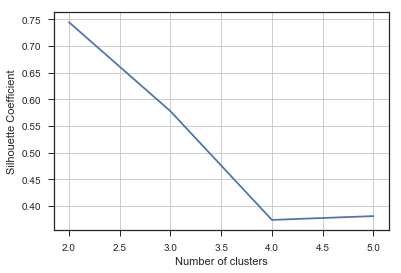

In [33]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

根据上面的结果显示分4组做K-means分析最好

In [ ]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
# create a "colors" array for plotting
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow','purple','orange'])
# scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(df1.push, df1.youzhi_rate, c=colors[df1.cluster])

# cluster centers, marked by "+"
plt.scatter(centers2.push, centers2.youzhi_rate, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.ylabel('youzhi_rate')
plt.xlabel('push')

从上面图来说，觉得kmeans 这个方法不太适用于异常商家的识别问题。感觉到第三组和第四组太混乱，没有明显的界限。此处选择k=4。

#### Hierarchy cluster

In [34]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np 
%matplotlib inline 


In [35]:
Z=linkage(df1_scaled,'ward')

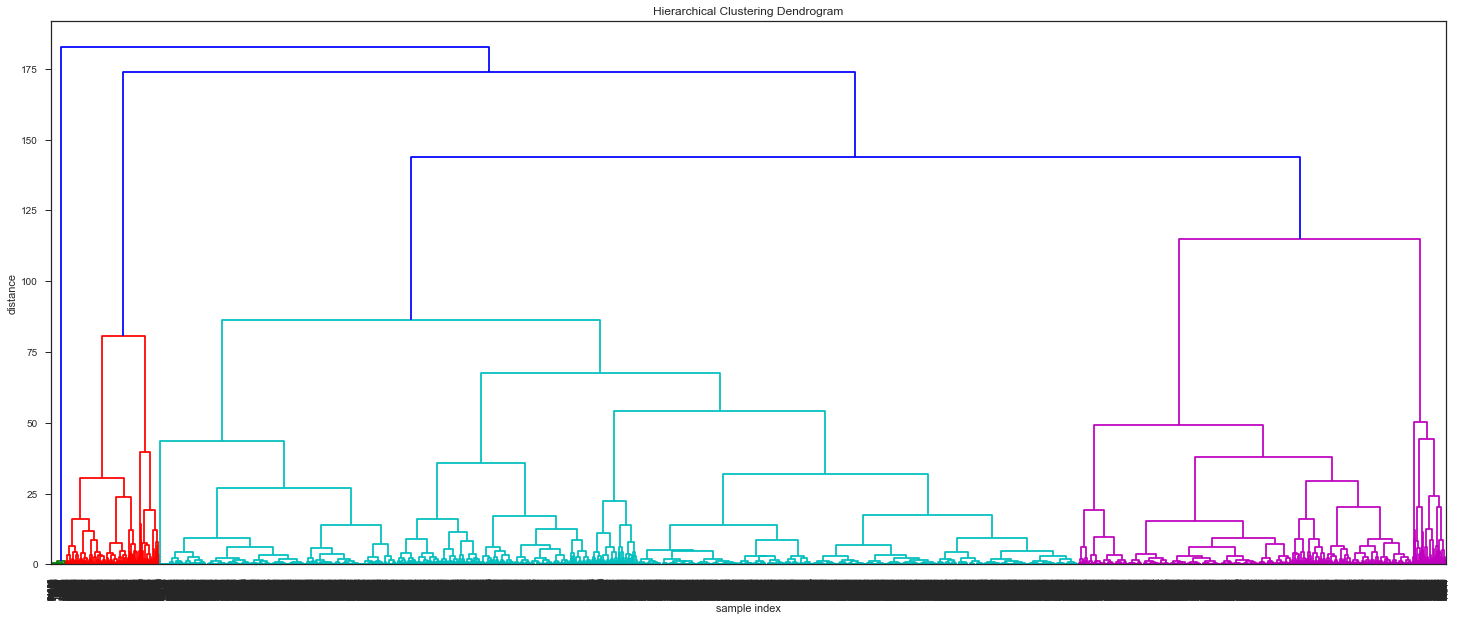

In [36]:
plt.figure(figsize=(25,10))
plt.title('Hierarchical Clustering Dendrogram') 
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [37]:
from scipy.cluster.hierarchy import fcluster
max_d = 50
clusters = fcluster(Z, max_d, criterion='distance')
clusters
k=4
df1['Hcluster']=fcluster(Z, k, criterion='maxclust')-1

/Users/ymzhang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


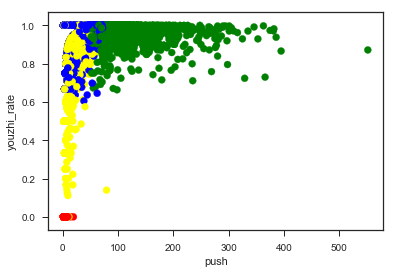

In [38]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
# create a "colors" array for plotting
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow','purple','orange','pink'])
# scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(df1.push, df1.youzhi_rate, c=colors[df1.Hcluster])

# cluster centers, marked by "+"
#plt.scatter(centers2.push, centers2.youzhi_rate, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('push')
plt.ylabel('youzhi_rate')

In [93]:
writer = pd.ExcelWriter('iforest.xlsx', engine='xlsxwriter')
iforest.to_excel(writer, sheet_name='Sheet1')

In [96]:
writer = pd.ExcelWriter('iforest_new.xlsx', engine='xlsxwriter')
iforest_new.to_excel(writer, sheet_name='Sheet1')

In [16]:
import seaborn as sns 
data = pd.read_excel(open('/Users/ymzhang/Desktop/yichangshanghu.xlsx','rb'), sheetname='Sheet0')

In [17]:
data1=data.dropna()

In [18]:
data.columns

Index(['order_date', 'restaurant_id', 'retailer_id', 'exp_cook_time',
       'cook_time', 'eleme_subsidy', 'shop_subsidy', 'total', 'subsidy_rate',
       'activity_number', 'recent_day_exposure_number',
       'recent_14day_exposure_number_avg', 'exposure_number_change',
       'recent_day_click_number', 'recent_14day_click_number_avg',
       'click_change', 'standard_product_name', 'yxzc_rate', 'request_num',
       'success_num', 'delivery_area', 'avg_order_amt_14', 'order_amt_change'],
      dtype='object')

In [19]:
data1['diff1']=data.cook_time-data.exp_cook_time

/Users/ymzhang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [20]:
v=['饿了么-蜂鸟快送','饿了么-蜂鸟专送KA','饿了么-蜂鸟众包','饿了么-蜂鸟专送','饿了么-单向支付']
data2=data1[data1.standard_product_name.isin(v)]

In [21]:
m=['order_amt_change','subsidy_rate','click_change','exp_cook_time','cook_time','diff1','yxzc_rate','request_num','delivery_area']
n=['restaurant_id','order_amt_change','subsidy_rate','click_change','exp_cook_time','cook_time','diff1','yxzc_rate','request_num','delivery_area']
q=data2[m].describe(percentiles=[0.5,0.75,0.85,0.95,0.98])


In [22]:
q

,order_amt_change,subsidy_rate,click_change,exp_cook_time,cook_time,diff1,yxzc_rate,request_num,delivery_area
count,24365.000000,24365.000000,24365.000000,24365.000000,24365.000000,24365.000000,24365.000000,24365.000000,24365.000000
mean,-0.111008,0.171479,-2.841784,16.472522,15.768192,-0.704330,0.081867,0.315288,18.489179
std,12.326904,0.133156,67.595632,3.008463,10.312358,10.152793,0.190808,0.750416,21.295002
min,-162.000000,0.000000,-1170.000000,1.000000,0.000000,-46.000000,0.000000,0.000000,0.987745
50%,-0.142857,0.157090,-5.071429,16.000000,15.000000,-2.000000,0.000000,0.000000,17.452716
75%,1.857143,0.264151,6.928571,18.000000,18.000000,2.000000,0.052632,0.000000,21.546387
85%,4.071429,0.324324,20.857143,20.000000,21.000000,4.000000,0.166667,1.000000,23.554538
95%,13.642857,0.412678,74.642857,21.000000,27.000000,10.000000,0.500000,2.000000,27.066062
98%,26.980000,0.461683,151.337143,23.000000,34.000000,17.000000,0.833333,3.000000,31.365046
max,316.500000,0.937500,1720.285714,74.000000,498.000000,476.000000,1.000000,12.000000,1762.844433


In [28]:
id=iforest_new.restaurant_id
data3=data2[data2.restaurant_id.isin(id)][n]


In [29]:
data3

,restaurant_id,order_amt_change,subsidy_rate,click_change,exp_cook_time,cook_time,diff1,yxzc_rate,request_num,delivery_area
189,20025,111.285714,0.248505,421.642857,12.0,22.0,10.0,0.067340,2.0,15.925480
550,54254,102.857143,0.254458,505.071429,21.0,28.0,7.0,0.064103,1.0,11.473419
701,80324,42.857143,0.442781,329.285714,16.0,19.0,3.0,0.006135,2.0,20.905625
2303,341083,2.357143,0.128628,-2.142857,17.0,17.0,0.0,0.000000,0.0,15.640037
2739,375247,8.714286,0.287757,-31.571429,16.0,17.0,1.0,0.612903,5.0,24.807985
3580,494137,-5.285714,0.108902,-10.785714,14.0,15.0,1.0,0.510638,0.0,21.928615
3692,512350,93.071429,0.326159,407.642857,11.0,20.0,9.0,0.017094,1.0,22.330310
4884,674761,-6.071429,0.494462,-38.214286,18.0,18.0,0.0,0.020408,0.0,24.385067
4945,684710,21.500000,0.000000,33.071429,21.0,20.0,-1.0,0.425000,0.0,15.785586
4984,691765,10.285714,0.013590,10.928571,18.0,29.0,11.0,0.000000,0.0,20.644552


In [27]:
data3

NameError: name 'data3' is not defined

In [30]:
data3.loc[data3.order_amt_change>data2.order_amt_change.quantile(0.95), 'order_amt_change'] = '爆单'

In [31]:
data3.loc[data3.click_change>data2.click_change.quantile(0.95), 'click_change'] = '流量爆单'

In [32]:
data3.loc[data3.cook_time>data2.cook_time.quantile(0.95), 'cook_time'] = '出餐慢'

In [33]:
data3.loc[data3.diff1>data2.diff1.quantile(0.95), 'diff1'] = '比预期出餐慢'

In [34]:
data3.loc[data3.yxzc_rate>data2.yxzc_rate.quantile(0.95), 'yxzc_rate'] = '夜宵早餐占比大'

In [36]:
data3.loc[data3.delivery_area>data2.delivery_area.quantile(0.95), 'delivery_area'] = '配送范围大'

In [38]:
data3

,restaurant_id,order_amt_change,subsidy_rate,click_change,exp_cook_time,cook_time,diff1,yxzc_rate,request_num,delivery_area
189,20025,爆单,0.248505,流量爆单,12.0,22,10,0.0673401,2.0,15.9255
550,54254,爆单,0.254458,流量爆单,21.0,出餐慢,7,0.0641026,1.0,11.4734
701,80324,爆单,0.442781,流量爆单,16.0,19,3,0.00613497,2.0,20.9056
2303,341083,2.35714,0.128628,-2.14286,17.0,17,0,0,0.0,15.64
2739,375247,8.71429,0.287757,-31.5714,16.0,17,1,夜宵早餐占比大,5.0,24.808
3580,494137,-5.28571,0.108902,-10.7857,14.0,15,1,夜宵早餐占比大,0.0,21.9286
3692,512350,爆单,0.326159,流量爆单,11.0,20,9,0.017094,1.0,22.3303
4884,674761,-6.07143,0.494462,-38.2143,18.0,18,0,0.0204082,0.0,24.3851
4945,684710,爆单,0.000000,33.0714,21.0,20,-1,0.425,0.0,15.7856
4984,691765,10.2857,0.013590,10.9286,18.0,出餐慢,比预期出餐慢,0,0.0,20.6446


In [30]:
writer = pd.ExcelWriter('data3.xlsx', engine='xlsxwriter')
data3.to_excel(writer, sheet_name='Sheet1')

In [41]:
writer = pd.ExcelWriter('iforest_new.xlsx', engine='xlsxwriter')
iforest_new.to_excel(writer, sheet_name='Sheet1')

In [166]:
baodan=data3[data3.order_amt_change>data2.order_amt_change.quantile(0.95)]
baodan.restaurant_id
baodan['yuanyin']='爆单'

/Users/ymzhang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [168]:
baodan

,restaurant_id,order_amt_change,subsidy_rate,click_change,exp_cook_time,cook_time,diff1,yxzc_rate,request_num,delivery_area,yuanyin
189,20025,111.285714,0.248505,421.642857,12.0,22.0,10.0,0.067340,2.0,15.925480,爆单
550,54254,102.857143,0.254458,505.071429,21.0,28.0,7.0,0.064103,1.0,11.473419,爆单
701,80324,42.857143,0.442781,329.285714,16.0,19.0,3.0,0.006135,2.0,20.905625,爆单
3692,512350,93.071429,0.326159,407.642857,11.0,20.0,9.0,0.017094,1.0,22.330310,爆单
4945,684710,21.500000,0.000000,33.071429,21.0,20.0,-1.0,0.425000,0.0,15.785586,爆单
5628,765537,30.285714,0.186423,169.142857,13.0,21.0,8.0,0.000000,0.0,20.418438,爆单
6145,875423,50.500000,0.284020,54.642857,19.0,15.0,-4.0,0.056604,0.0,34.648640,爆单
6611,935046,20.714286,0.002763,156.928571,20.0,31.0,11.0,0.020408,1.0,16.133350,爆单
8253,1155923,79.285714,0.378112,417.500000,18.0,25.0,7.0,0.012158,1.0,21.517415,爆单
9127,1236835,21.000000,0.120645,25.928571,15.0,27.0,12.0,0.080000,0.0,23.503735,爆单


In [147]:
yexiao=data3[data3.yxzc_rate>data2.yxzc_rate.quantile(0.95)]
yexiao.restaurant_id
yexiao

2739        375247
3580        494137
13790      1826707
23369    152162865
Name: restaurant_id, dtype: int64

In [148]:
man=data3[data3.cook_time>data2.cook_time.quantile(0.95)]
man.restaurant_id

550          54254
4984        691765
6611        935046
9635       1278957
10106      1323219
10540      1350145
12066      1490650
12814      1557321
13736      1823400
15972      1994944
19850    150038076
19974    150059819
24555    154897167
Name: restaurant_id, dtype: int64

In [149]:
man1=data3[data3.diff1>data2.diff1.quantile(0.95)]
man1.restaurant_id

4984        691765
6611        935046
9127       1236835
9635       1278957
10106      1323219
10540      1350145
11556      1438863
12066      1490650
12814      1557321
13736      1823400
19974    150059819
23908    152331206
24555    154897167
Name: restaurant_id, dtype: int64

In [114]:
liudan=baodan[baodan.click_change>75].shape

In [ ]:
data3[data3.order_amt_change>data2.order_amt_change.quantile(0.95)]

In [95]:
data2[m][data2.restaurant_id==1155923]

,order_amt_change,subsidy_rate,click_change,exp_cook_time,cook_time,diff,yxzc_rate,request_num,delivery_area
8253,79.285714,0.378112,417.5,18.0,25.0,7.0,0.012158,1.0,21.517415


In [75]:
data.shape[0]-data2.shape[0]

27

In [76]:
data.shape[0]

24714

In [77]:
data2.shape[0]

24687

In [91]:
data2[data2.restaurant_id==1155923]

,order_date,restaurant_id,retailer_id,exp_cook_time,cook_time,eleme_subsidy,shop_subsidy,total,subsidy_rate,activity_number,...,recent_14day_click_number_avg,click_change,standard_product_name,yxzc_rate,request_num,success_num,delivery_area,avg_order_amt_14,order_amt_change,diff
8253,2017-04-18,1155923,1431232,18.0,25.0,866.0,5916.2,17937.0,0.378112,10.0,...,1578.5,417.5,饿了么-蜂鸟专送,0.012158,1.0,1.0,21.517415,249.714286,79.285714,7.0
